#### 붓꽃의 무게와 크기로 생선 분류
- 데이터셋: Iris.csv
- 피처/입력데이터: petal.length, petal.width
- 타겟/클래스/출력: variety
- 기계학습 방법: 지도학습 ==> 분류
- 분류 알고리즘(문제해결방법): 최근접이웃알고리즘(KNN)

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [62]:
# 데이터확인
irisDF = pd.read_csv('./DATA/iris.csv')
irisDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [63]:
irisDF.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [64]:
irisDF_var = irisDF['variety'].unique().tolist()
irisDF['v_code'] = irisDF['variety'].map(lambda x:irisDF_var.index(x)+1)
irisDF['v_code'].unique()

array([1, 2, 3], dtype=int64)

In [65]:
irisDF.corr(numeric_only=True)

,sepal.length,sepal.width,petal.length,petal.width,v_code
sepal.length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal.width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal.length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal.width,0.817941,-0.366126,0.962865,1.000000,0.956547
v_code,0.782561,-0.426658,0.949035,0.956547,1.000000


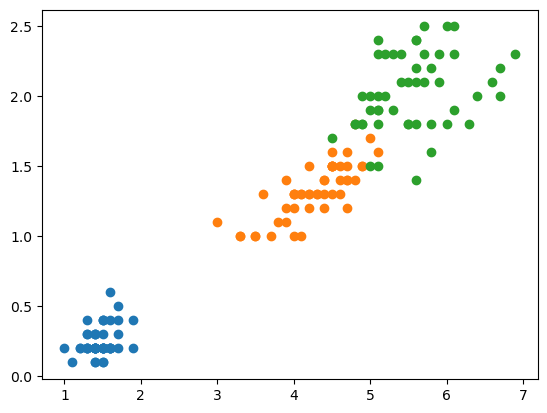

In [66]:
plt.scatter(irisDF[irisDF['v_code'] == 1]['petal.length'],irisDF[irisDF['v_code'] == 1]['petal.width'])
plt.scatter(irisDF[irisDF['v_code'] == 2]['petal.length'],irisDF[irisDF['v_code'] == 2]['petal.width'])
plt.scatter(irisDF[irisDF['v_code'] == 3]['petal.length'],irisDF[irisDF['v_code'] == 3]['petal.width'])
plt.show()

v_code와 가장 상관계수가 높은 petal.length, petal.width로 분류시작 

In [67]:
petalDF1 = irisDF[irisDF.columns[[2,3,5]]]
petalDF2 = irisDF[irisDF.columns[[0,1,5]]]
petalDF1.columns=['length','width','v_code']
petalDF2.columns=['length','width','v_code']
petalDF1.head(5)

,length,width,v_code
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [68]:
features1 = petalDF1[['length','width']]
target1 = petalDF1['v_code']
features2 = petalDF2[['length','width']]
target2 = petalDF2['v_code']

print(f'features.shape: {features1.shape}, {features1.ndim}D')
print(f'target.shape: {target1.shape}, {target1.ndim}D')
print(f'features.shape: {features2.shape}, {features2.ndim}D')
print(f'target.shape: {target2.shape}, {target2.ndim}D')

features.shape: (150, 2), 2D
target.shape: (150,), 1D
features.shape: (150, 2), 2D
target.shape: (150,), 1D


In [69]:
model1 = KNeighborsClassifier(n_neighbors=5)
model2 = KNeighborsClassifier(n_neighbors=5)

In [70]:
# train:test = 80:20 ===> test_size=0.2 또는 train_size=0.8
# stratify 매개변수 : 분류일 경우 사용, 분류 타겟의 종류에 대한 비율을 고려
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(features1,
                                                    target1,
                                                    test_size=0.2,
                                                    stratify=target1,
                                                    random_state=10)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(features2,
                                                    target2,
                                                    test_size=0.2,
                                                    stratify=target2,
                                                    random_state=10)

In [71]:
print(f'X_train1: {X_train1.shape}, {X_train1.ndim} / X_train2: {X_train2.shape}, {X_train2.ndim}')
print(f'X_test1: {X_test1.shape}, {X_test1.ndim} / X_test2: {X_test2.shape}, {X_test2.ndim}')
print(f'Y_train1: {Y_train1.shape}, {Y_train1.ndim} / Y_train2: {Y_train2.shape}, {Y_train2.ndim}')
print(f'Y_test1: {Y_test1.shape}, {Y_test1.ndim} / Y_test2: {X_train2.shape}, {Y_test2.ndim}')


X_train1: (120, 2), 2 / X_train2: (120, 2), 2
X_test1: (30, 2), 2 / X_test2: (30, 2), 2
Y_train1: (120,), 1 / Y_train2: (120,), 1
Y_test1: (30,), 1 / Y_test2: (120, 2), 1


In [72]:
Y_train.value_counts()[1]/Y_train.shape[0],Y_test.value_counts()[1]/Y_test.shape[0]

(0.3333333333333333, 0.3333333333333333)

In [79]:
model1.fit(X_train1,Y_train1)
model2.fit(X_train2,Y_train2)

KNeighborsClassifier()

In [81]:
print(model1.classes_, model1.feature_names_in_, model1.n_samples_fit_)
print(model2.classes_, model2.feature_names_in_, model2.n_samples_fit_)

[1 2 3] ['length' 'width'] 120
[1 2 3] ['length' 'width'] 120


In [84]:
print(model1.score(X_test1,Y_test1))
print(model2.score(X_test2,Y_test2))

1.0
0.8


In [88]:
new_data1 = pd.DataFrame([[1.2, 0.3]], columns=model1.feature_names_in_)
new_data2 = pd.DataFrame([[5, 4]], columns=model2.feature_names_in_)

In [94]:
distance1, index1 = model1.kneighbors(new_data1)
distance2, index2 = model2.kneighbors(new_data2)
print(distance1,distance2)
print(index1,index2)
neighbors1 = index1.reshape(-1).tolist()
neighbors2 = index2.reshape(-1).tolist()

[[0.1        0.1        0.1        0.1        0.14142136]] [[0.2236068  0.2236068  0.2236068  0.2236068  0.31622777]]
[[116  38  97  23  96]] [[109 102  86 118  58]]


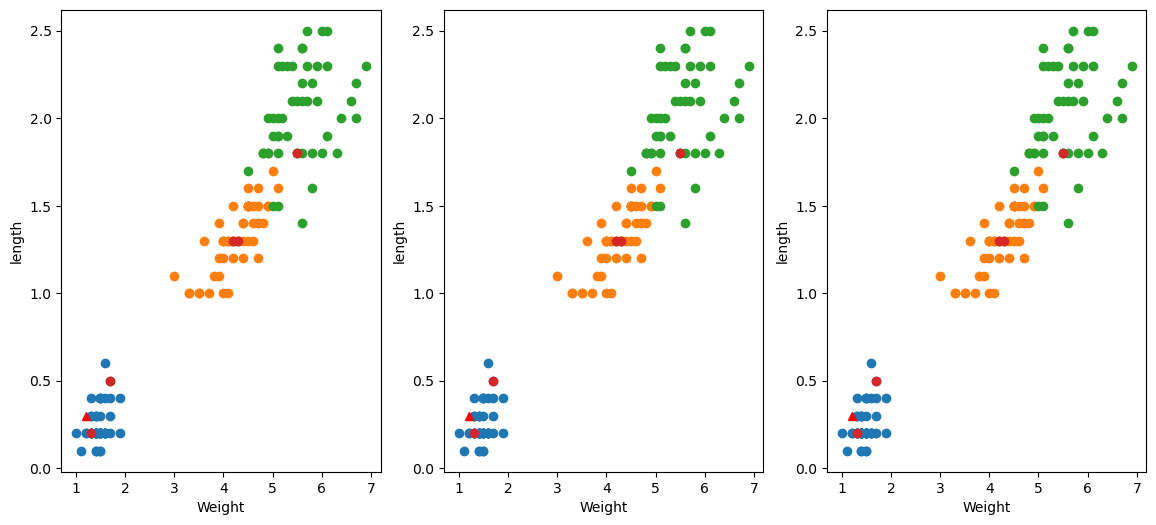

In [107]:
# 시각화로 확인
# 도미(Bream), 빙어(Smelt)에 대한 시각화
df_list = [petalDF1,petalDF2]
new_data_list = [new_data1,new_data2]
neighbors_list = [neighbors1,neighbors2]

fig , axs = plt.subplots(1,3,figsize = (14,6))
for idx,ax in enumerate(axs):
    ax.scatter(df_list[idx].loc[df_list[idx]['v_code'] == 1 ,'length'],df_list[idx].loc[df_list[idx]['v_code'] == 1 ,'width'])
    ax.scatter(df_list[idx].loc[df_list[idx]['v_code'] == 2 ,'length'],df_list[idx].loc[df_list[idx]['v_code'] == 2 ,'width'])
    ax.scatter(df_list[idx].loc[df_list[idx]['v_code'] == 3 ,'length'],df_list[idx].loc[df_list[idx]['v_code'] == 3 ,'width'])
    ax.plot(new_data_list[idx]['length'],new_data_list[idx]['width'], color='r', marker='^')
    ax.scatter(petalDF1.iloc[neighbors_list[idx]]['length'],petalDF1.iloc[neighbors_list[idx]]['width'])
    ax.set_xlabel('Weight')
    ax.set_ylabel('length')
plt.show()